## 4.10 Coding Etiquette & Excel Reporting

### This notebook contains the following:
#### 1. Import libraries & import data from 4.9
#### 2. Address security implications
#### 3. Create a regional segmentation of the data
####    - 3.1. Set up region column
####    - 3.2. Create a crosstab to compare spending habits in different regions
#### 4. Create an exclusion flag to exclude low-activity customers from the data
#### 5. Create profiling variables
####    - 5.1. Age
####    - 5.2 Income
####    - 5.3 Number of Dependents
#### 6. Visualizations to show distributions of profiles
####    - 6.1. Age Groups
####    - 6.2. Income Groups
####    - 6.3. Customers w/ Dependents
#### 7. Aggregate max, min, & mean variables on customer-profile level for usage frequency and expenditure
####    - 7.1. Age Group
####    - 7.2. Income Group
####    - 7.3. Dependents Category
#### 8. Compare customer profiles w/ regions & departments. Identify any links. Customers may demonstrate different behaviors across 
####    regions, which could make this information important.
####    - 8.1 Profile by Region
####    - 8.2 Profile by Department Sales
####    - 8.3. Profiles by Frequency
#### 9. Visualizations
#### 10. Export Final Data Set
####     Additional Analysis

### 1. Import libraries & import data from 4.9

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Tell Python to remember a main folder path
path = r'/Users/gideon/Desktop/27-06-2020 Instacart Basket analysis'

In [5]:
# Import most up-to-date project data
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [6]:
instacart.shape

(32404859, 33)

In [7]:
#checking Dataframe
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


### 2. Address security implications

In [10]:
# Display all the columns of the dataframe
pd.options.display.max_columns = None

In [11]:
# Check data for reminder of contents
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,NaN,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,NaN,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,7.0,NaN,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,7.0,10,0,Mid-range product,regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low_spender,9.0,NaN,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low_spender,9.0,NaN,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [15]:
# addrressing PII data
# Dropping first name column due to PII
instacart.drop(['first_name', 'surname'], axis=1, inplace = True)

In [16]:
#checking column names
instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'customer_frequency', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'marital_status',
       'income', '_merge'],
      dtype='object')

### 3. Create a regional segmentation of the data

#### 3.1. Set up region column

In [20]:
# Create Region column - organize by state and region
northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

In [21]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [22]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [23]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [26]:
# Create region columns
instacart.loc[instacart['state'].isin(northeast_region), 'region'] = 'Northeast'

In [28]:
instacart.loc[instacart['state'].isin(midwest_region), 'region'] = 'Midwest'

In [30]:
instacart.loc[instacart['state'].isin(south_region), 'region'] = 'South'

In [31]:
instacart.loc[instacart['state'].isin(west_region), 'region'] = 'West'

In [32]:
# Checking length of new column
len(instacart['region'])

32404859

##### Matches with instacart column length

In [33]:
# Checking data
instacart['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### 3.2. Creating a crosstab to compare spending habits in different U.S. regions:

In [34]:
# create a crosstab between 'region' and 'spending_flag'
region_spending_crosstab = pd.crosstab(instacart['region'], instacart['spender_flag'], dropna = False)

In [35]:
region_spending_crosstab

spender_flag,High_spender,Low_spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


#### For big data, you can save to clipboard and view in excel

### 4. Create an exclusion flag for low-activity customers and export this sample.

In [36]:
# Exclude customers w/ max_order less than 5 
instacart.loc[instacart['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [37]:
# Keep customers where max_order is greater than or equal to 5
instacart.loc[instacart['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [38]:
#Check the dataframe
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,NaN,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,NaN,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,7.0,NaN,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Keep
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,7.0,10,0,Mid-range product,regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low_spender,9.0,NaN,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Exclude
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low_spender,9.0,NaN,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Exclude


In [39]:
# Check frequencies
instacart['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [40]:
# Check exclusion flag using crosstab
exclusion_flag_check = pd.crosstab(instacart['exclusion_flag'], instacart['max_order'], dropna = False)

In [41]:
exclusion_flag_check.to_clipboard()

#### The exclusion flag was verified in Excel - All rows where max_order is less than 5 are marked with 'Exclude'

In [43]:
# Create sample without 'exclude' rows called ords_prods_in
instacart = instacart[instacart['exclusion_flag'] == 'Keep']

In [44]:
# Check sample
instacart.shape

(30964564, 33)

##### Since the number of rows in the dataset matches the frequency of "Keep" entries in the "Exclusion_Flag" column, we can confidently conclude that this sample contains only the relevant data, excluding any rows related to customers who have made fewer than 5 orders. This ensures that the dataset focuses solely on customers who are active users of the platform, providing a more accurate representation for analysis.

In [46]:
# Export Sample
instacart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_sample.pkl'))

### 5. Create profiling variables

#### 5.1 Age

##### The age categories are subjective, but based on standard ranges. Young adult =< 25, Adult 25-45,Older Adult 45-65 Senior 65+

In [50]:
#Creating age profiling variable
instacart.loc[instacart['age']<=25, 'age_group']='Young Adult'
instacart.loc[(instacart['age']>25)&(instacart['age']<45), 'age_group']='Adult'
instacart.loc[(instacart['age']>=45)&(instacart['age']<65), 'age_group']='Older Adult'
instacart.loc[instacart['age']>=65, 'age_group']='Senior'

In [51]:
# Check frequency of age_group and ensure no NaNs
instacart['age_group'].value_counts(dropna = False)

age_group
Older Adult    9690051
Adult          9214451
Senior         8195544
Young Adult    3864518
Name: count, dtype: int64

In [52]:
instacart.dropna()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag,age_group
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Mid-range product,regularly busy,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,both,West,Keep,Older Adult
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Mid-range product,regularly busy,Regularly busy,Most orders,9,New customer,5.957576,Low_spender,19.0,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,Keep,Young Adult
10,1,Chocolate Sandwich Cookies,61,19,5.8,1798115,1379,1,5,11,7.0,1,0,Mid-range product,regularly busy,Regularly busy,Most orders,10,New customer,5.813636,Low_spender,20.0,Regular customer,Male,Alaska,61,3/30/2020,1,married,42573,both,West,Keep,Older Adult
37,1,Chocolate Sandwich Cookies,61,19,5.8,627615,1647,1,1,9,7.0,1,0,Mid-range product,regularly busy,Busiest days,Most orders,10,New customer,4.853521,Low_spender,25.0,Non-frequent customer,Male,Indiana,67,4/11/2019,0,divorced/widowed,39869,both,Midwest,Keep,Senior
38,1,Chocolate Sandwich Cookies,61,19,5.8,2507439,1647,4,0,13,18.0,6,1,Mid-range product,Busiest day,Busiest days,Most orders,10,New customer,4.853521,Low_spender,25.0,Non-frequent customer,Male,Indiana,67,4/11/2019,0,divorced/widowed,39869,both,Midwest,Keep,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404845,49688,Fresh Foaming Cleanser,73,11,13.5,1525694,178752,15,5,10,30.0,3,1,Mid-range product,regularly busy,Regularly busy,Most orders,16,Regular customer,8.643223,Low_spender,21.0,Non-frequent customer,Female,Washington,81,2/7/2019,2,married,103440,both,West,Keep,Senior
32404846,49688,Fresh Foaming Cleanser,73,11,13.5,2439069,182948,4,6,16,13.0,1,0,Mid-range product,regularly busy,Regularly busy,Most orders,8,New customer,7.306667,Low_spender,16.0,Regular customer,Female,Georgia,58,4/16/2019,1,married,105378,both,South,Keep,Older Adult
32404847,49688,Fresh Foaming Cleanser,73,11,13.5,2392655,182948,8,2,11,16.0,28,1,Mid-range product,regularly busy,Regularly busy,Most orders,8,New customer,7.306667,Low_spender,16.0,Regular customer,Female,Georgia,58,4/16/2019,1,married,105378,both,South,Keep,Older Adult
32404849,49688,Fresh Foaming Cleanser,73,11,13.5,2251059,184081,1,6,9,7.0,4,0,Mid-range product,regularly busy,Regularly busy,Most orders,11,Regular customer,7.684426,Low_spender,12.0,Regular customer,Male,Nebraska,66,5/18/2019,0,divorced/widowed,106393,both,Midwest,Keep,Senior


In [53]:
# Aggregate for age group usage frequency
instacart.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Adult                    10.611760  0.0  30.0
Older Adult              10.620067  0.0  30.0
Senior                   10.587760  0.0  30.0
Young Adult              10.594659  0.0  30.0

In [54]:
# Aggregate for age group expenditure
instacart.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Adult        11.786432  1.0  99999.0
Older Adult  12.112030  1.0  99999.0
Senior       11.757768  1.0  99999.0
Young Adult  12.209359  1.0  99999.0

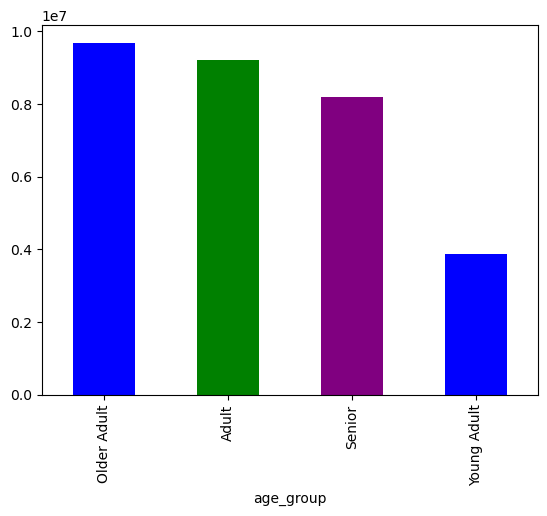

In [55]:
# Age profile visualization
bar=instacart['age_group'].value_counts().plot.bar(color =['blue', 'green', 'purple'])

In [58]:
# Export Bar Chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_agegroup.png'))

#### 5.2 Income

##### Categorize customers into income categories: low, middle, & high income groups(based on standard considerations of US incomes)

In [61]:
# Ensure you modify the DataFrame directly
instacart.loc[instacart['income'] <= 50000, 'Income_group'] = 'Low'
instacart.loc[(instacart['income'] > 50000) & (instacart['income'] <= 100000), 'Income_group'] = 'Middle'
instacart.loc[instacart['income'] > 100000, 'Income_group'] = 'High'

In [62]:
# Check frequency of income_group and ensure no NaNs
instacart['Income_group'].value_counts(dropna = False)

Income_group
High      14207028
Middle    13394982
Low        3362554
Name: count, dtype: int64

In [63]:
# Aggregate for income group order frequency
instacart.groupby('Income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
Income_group                                  
High                      10.569025  0.0  30.0
Low                       10.934052  0.0  30.0
Middle                    10.562572  0.0  30.0

In [64]:
# Aggregate for income group expenditure
instacart.groupby('Income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                   mean  min      max
Income_group                         
High          16.461733  1.0  99999.0
Low            6.707347  1.0     25.0
Middle         8.442726  1.0  99999.0

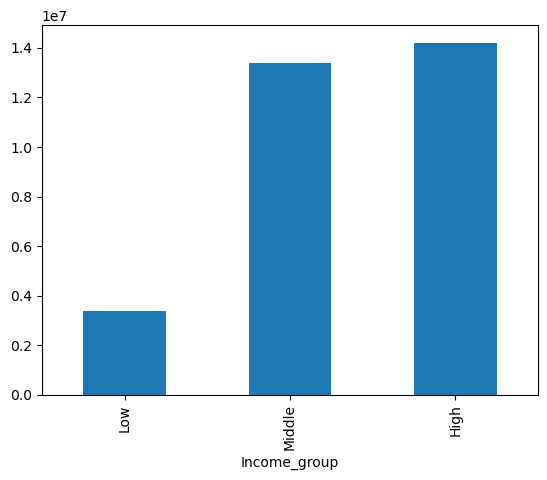

In [67]:
# Income profile visualization
bar2 = instacart['Income_group'].value_counts().sort_values().plot.bar()

In [68]:
# Export Bar Chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_incomegroup.png'))

### 5.3. Number of Dependants

#### Dividing data between the customers with dependents and customers with no dependents

In [71]:
instacart.loc[instacart['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'

In [72]:
# Update 'dependents_flag' where 'number_of_dependants' is greater than 0
instacart.loc[instacart['n_dependants'] > 0, 'dependants_flag'] = 'Has Dependants'

# Update 'dependents_flag' where 'nunber_of_dependants' is 0
instacart.loc[instacart['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'

In [73]:
#Check data
instacart['dependants_flag'].value_counts(dropna = False)

dependants_flag
Has Dependants    23224883
No Dependants      7739681
Name: count, dtype: int64

In [74]:
# Aggregate for dependent group order frequency
instacart.groupby('dependants_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
dependants_flag                                  
Has Dependants               10.611587  0.0  30.0
No Dependants                10.588728  0.0  30.0

In [75]:
# Aggregate for dependent group expenditure
instacart.groupby('dependants_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependants_flag                         
Has Dependants   11.877157  1.0  99999.0
No Dependants    12.102657  1.0  99999.0

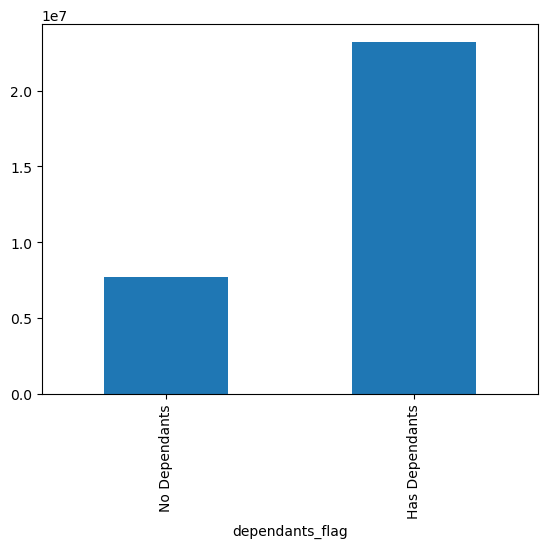

In [76]:
# Number of dependent group profile visualization

bar3 = instacart['dependants_flag'].value_counts().sort_values().plot.bar()

In [77]:
# Export Bar Chart
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependentgroup.png'))

### 6. Visualizations to show distributions of profiles

In [78]:
print(instacart.columns)

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'customer_frequency', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'marital_status',
       'income', '_merge', 'region', 'exclusion_flag', 'age_group',
       'Income_group', 'dependants_flag'],
      dtype='object')


In [79]:
# Create a unique user_id sample and take relevant columns
user_sample = instacart[['user_id', 'age_group', 'Income_group', 'dependants_flag', 'region', 'loyalty_flag']]

In [80]:
# Remove duplicate rows in the user_sample to obtain a sample of all unique customers
user_sample = user_sample.drop_duplicates()

In [81]:
# Check data
user_sample

,user_id,age_group,Income_group,dependants_flag,region,loyalty_flag
0,138,Senior,Low,Has Dependants,Midwest,Regular customer
2,709,Senior,High,Has Dependants,Northeast,New customer
5,777,Older Adult,Middle,Has Dependants,West,Regular customer
6,825,Young Adult,Low,Has Dependants,South,New customer
7,910,Senior,Low,No Dependants,South,Regular customer
...,...,...,...,...,...,...
30422584,169498,Older Adult,High,Has Dependants,Northeast,New customer
30722969,28213,Adult,High,Has Dependants,South,New customer
31448195,18512,Senior,Middle,No Dependants,Midwest,New customer
31925360,31628,Adult,Low,Has Dependants,South,New customer


#### 6.1 Age Groups

In [84]:
# Create age_group counts table
age_group_counts = user_sample['age_group'].value_counts()

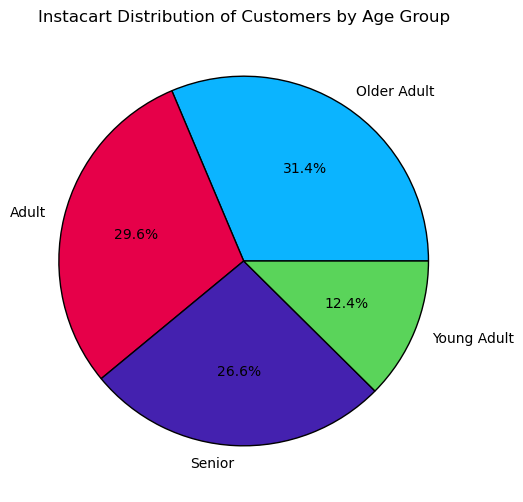

In [85]:
# Pie Chart
plt.figure(figsize=(6, 6)) # size of chart
plt.pie(age_group_counts, 
        labels = age_group_counts.index, 
        autopct='%.1f%%', # Show percentage to 1 d.p
        colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
        wedgeprops = {'edgecolor' : 'black'}) # boarders
plt.title('Instacart Distribution of Customers by Age Group') # title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save
plt.show()

#### 6.2 Income groups

In [86]:
# Create a table of income_group counts
income_group_counts = user_sample['Income_group'].value_counts()

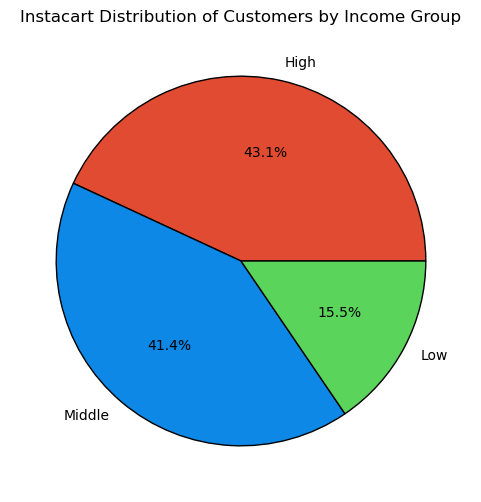

In [87]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(income_group_counts, 
        labels = income_group_counts.index, 
        autopct='%.1f%%',
        colors = ['#e14b31', '#0d88e6', '#5ad45a'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Distribution of Customers by Income Group')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_income_groups_pie.png'), bbox_inches = 'tight')
plt.show()

#### 6.3 Dependants

In [88]:
# create a table of dependents_flag counts
dependants_flag_counts = user_sample['dependants_flag'].value_counts()

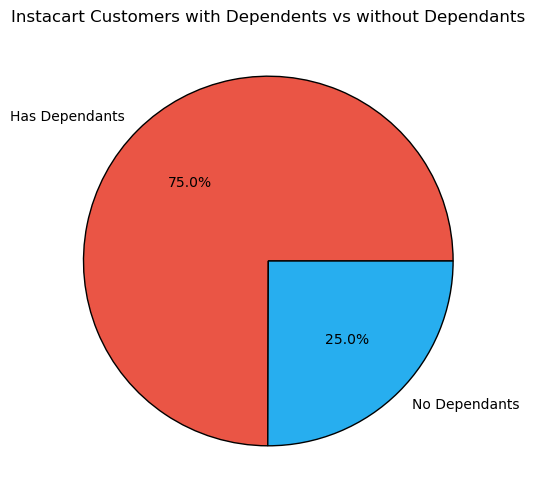

In [89]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(dependants_flag_counts, 
        labels = dependants_flag_counts.index, 
        autopct='%.1f%%', 
        colors = ['#ea5545', '#27aeef'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Customers with Dependents vs without Dependants')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependants_pie.png'), bbox_inches = 'tight')
plt.show()

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

#### Usage frequency is analyzed based on days since prior order & expenditure based on prices columns. For accuracy, aggregate the data from the instacart DataFrame so that each row represents a single order.

In [90]:
# An aggregated subset of data with 'prices' column as the total cost of each order:
orders_subset = instacart.groupby(['user_id', 'age_group', 'Income_group', 'dependants_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [91]:
# Rename 'prices' to 'order_total'
orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [92]:
# Check subset
orders_subset

,user_id,age_group,Income_group,dependants_flag,loyalty_flag,region,order_number,days_since_prior_order,order_total
0,1,Adult,Low,Has Dependants,New customer,South,1,7.0,31.6
1,1,Adult,Low,Has Dependants,New customer,South,2,15.0,35.4
2,1,Adult,Low,Has Dependants,New customer,South,3,21.0,28.2
3,1,Adult,Low,Has Dependants,New customer,South,4,29.0,26.0
4,1,Adult,Low,Has Dependants,New customer,South,5,28.0,57.0
...,...,...,...,...,...,...,...,...,...
3064370,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,30,4.0,6.7
3064371,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,31,8.0,25.1
3064372,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,32,5.0,44.4
3064373,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,33,6.0,41.2


#### 7.1 Aggregations by Age group

In [93]:
# max, min, mean by age category
aggregations_by_age_gp = orders_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_age_gp

days_since_prior_order                  order_total              \
                               min       mean   max         min        mean   
age_group                                                                     
Adult                          0.0  10.223105  30.0         1.0  119.610506   
Older Adult                    0.0  10.202630  30.0         1.0  122.186566   
Senior                         0.0  10.193160  30.0         1.0  118.277401   
Young Adult                    0.0  10.201439  30.0         1.0  123.799381   

                       
                  max  
age_group              
Adult        100384.5  
Older Adult  100452.9  
Senior       100330.2  
Young Adult  100265.6

#### All the age groups follow same frequency of shopping

#### 7.2 Aggregations by Income Group

In [94]:
# max, min, mean by age category
aggregations_by_income_gp = orders_subset.groupby('Income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_income_gp

days_since_prior_order                  order_total              \
                                min       mean   max         min        mean   
Income_group                                                                   
High                            0.0  10.091333  30.0         1.0  173.631537   
Low                             0.0  10.831101  30.0         1.0   52.629435   
Middle                          0.0  10.118068  30.0         1.0   87.742358   

                        
                   max  
Income_group            
High          100452.9  
Low              875.0  
Middle        100264.7

#### From the data, we can see that the customers with lower income spend lees than the average and their order frequency is low when compared with middle and high income groups

#### 7.3. Aggregations by Dependants Category

In [95]:
# max, min, mean by dependants category
aggregations_by_dependants_gp = orders_subset.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                               'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_dependants_gp

days_since_prior_order                  order_total  \
                                   min       mean   max         min   
dependants_flag                                                       
Has Dependants                     0.0  10.208390  30.0         1.0   
No Dependants                      0.0  10.198976  30.0         1.0   

                                       
                       mean       max  
dependants_flag                        
Has Dependants   120.109315  100452.9  
No Dependants    122.006145  100384.5

#### From the result, we can see that there seems to be not much difference between the customers with dependants and the customers with no dependants in terms of spending

### 8. Compare customer profiles with regions and departments and identify any links?

#### The behaviors to be examined include frequency/loyalty, product_prices, and order_totals

In [96]:
# Get names of each department back into the data
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [97]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [101]:
df_dept.rename(columns={'Unnamed: 0':'department_id'}, inplace=True )

In [102]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [103]:
# Turning department dataframe into data dictionary
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [105]:
# Connect department names to department_id in dataframe
instacart['department'] = instacart['department_id'].map(data_dict)

/var/folders/d9/m6pz848x453dch7l819567br0000gn/T/ipykernel_11804/2996205100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart['department'] = instacart['department_id'].map(data_dict)


In [106]:
# Checking dataframe
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag,age_group,Income_group,dependants_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,NaN,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Senior,Low,Has Dependants,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,NaN,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Senior,Low,Has Dependants,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,7.0,NaN,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Keep,Senior,High,Has Dependants,snacks
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Mid-range product,regularly busy,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,both,West,Keep,Older Adult,Middle,Has Dependants,snacks
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Mid-range product,regularly busy,Regularly busy,Most orders,9,New customer,5.957576,Low_spender,19.0,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,Keep,Young Adult,Low,Has Dependants,snacks


### 8. Compare your customer profiles with regions and departments. Produce suitable charts to illustrate your reports and export them in your project folder.

#### 8.1. Profile by Region

#### 8.1(a) Income groups

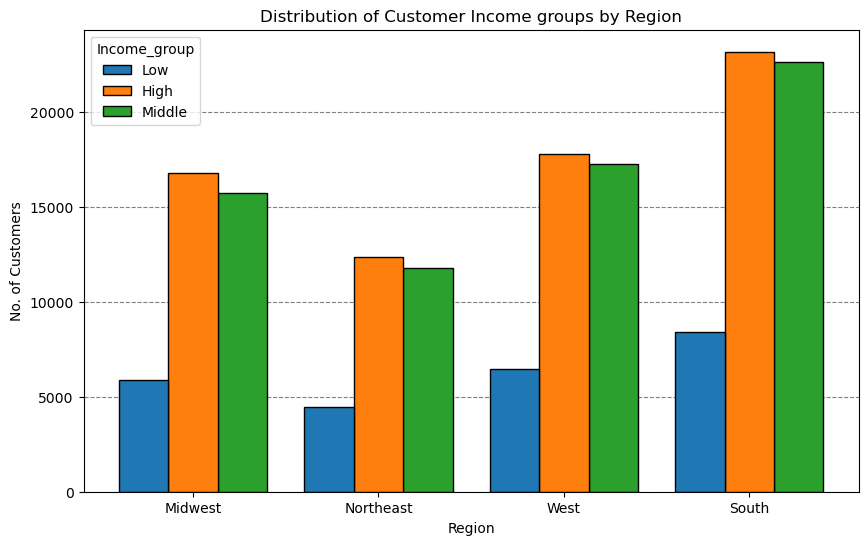

In [108]:
# A histogram could work to show the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='Income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Income groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

In [109]:
# Check above graph using crosstab
pd.crosstab(user_sample['Income_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
Income_group,,,,
High,16756,12369,23156,17799
Low,5891,4440,8403,6458
Middle,15729,11772,22634,17224


#### 8.1(b) Age Groups

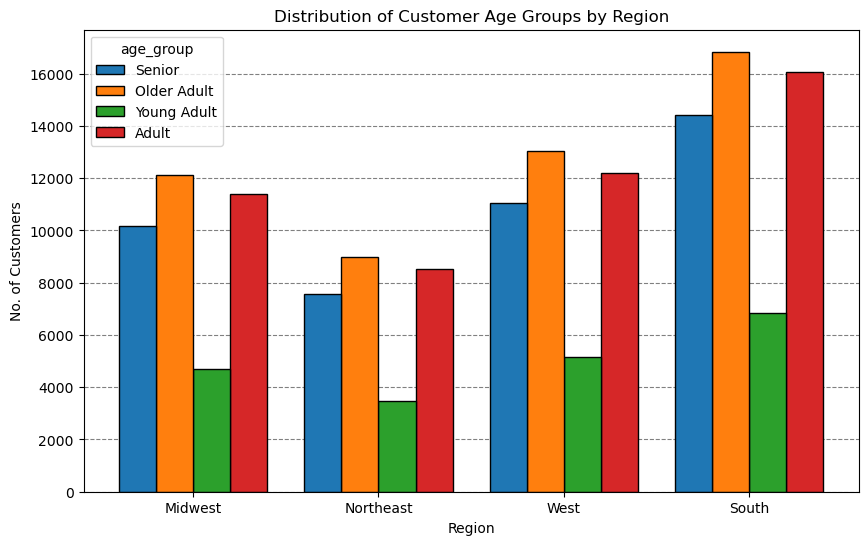

In [110]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

In [111]:
# Check above graph using crosstab
pd.crosstab(user_sample['age_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
age_group,,,,
Adult,11379,8527,16071,12214
Older Adult,12119,9000,16839,13035
Senior,10169,7580,14433,11068
Young Adult,4709,3474,6850,5164


#### 8.1(c) Department groups

In [112]:
# Creating crosstab for region and department
region_dep = pd.crosstab(instacart['department'], instacart['region'], dropna = False)

In [113]:
# Checking Crosstab
region_dep

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


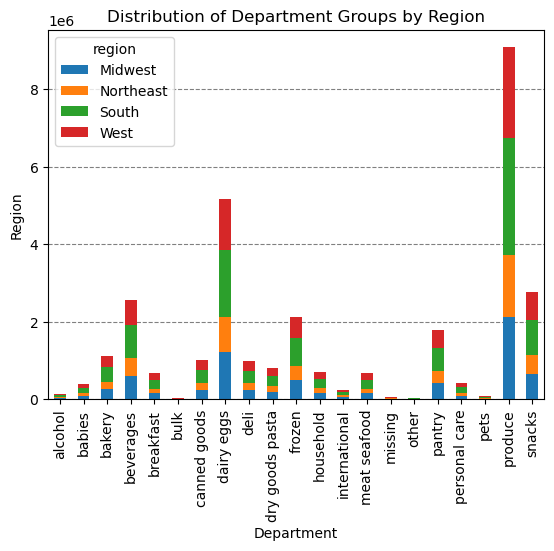

In [114]:
# Region_department Bar Chart
bar5 = region_dep.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department Groups by Region')
plt.ylabel('Region')
plt.xlabel('Department')

# Exporting bar chart
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'))

#### 8.1(d) Dependants

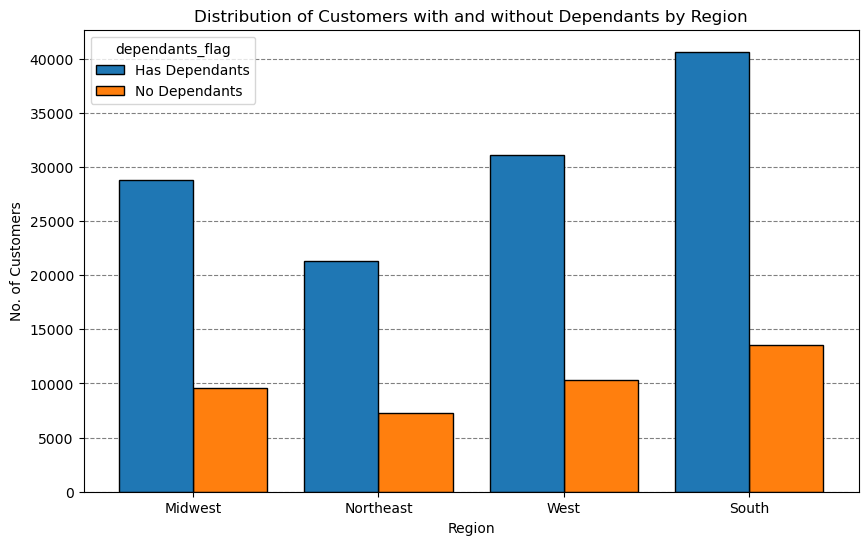

In [115]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependants by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_dependants_by_region.png'), bbox_inches = 'tight')
plt.show()

#### 8.1(e) Price range

In [116]:
# Creating crosstab for region and price range
region_pricerange = pd.crosstab(instacart['region'], instacart['price_range_loc'], dropna = False)

In [117]:
# Checking crosstab
region_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,93280,2267085,4901148
Northeast,69732,1712360,3682593
South,132661,3217500,6960978
West,102280,2477895,5347052


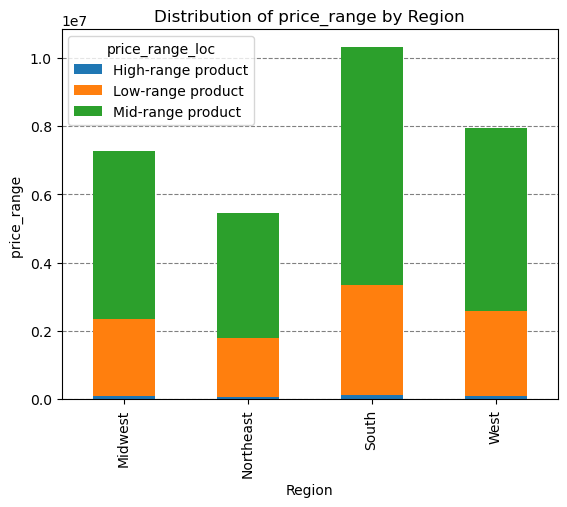

In [118]:
# Region_pricerange Bar Chart
bar6 = region_pricerange.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of price_range by Region')
plt.ylabel('price_range ')
plt.xlabel('Region')

# Exporting bar chart
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_pricerange.png'))

### 8.2. Profiles by Department Sales

#### 8.2(a) Income groups

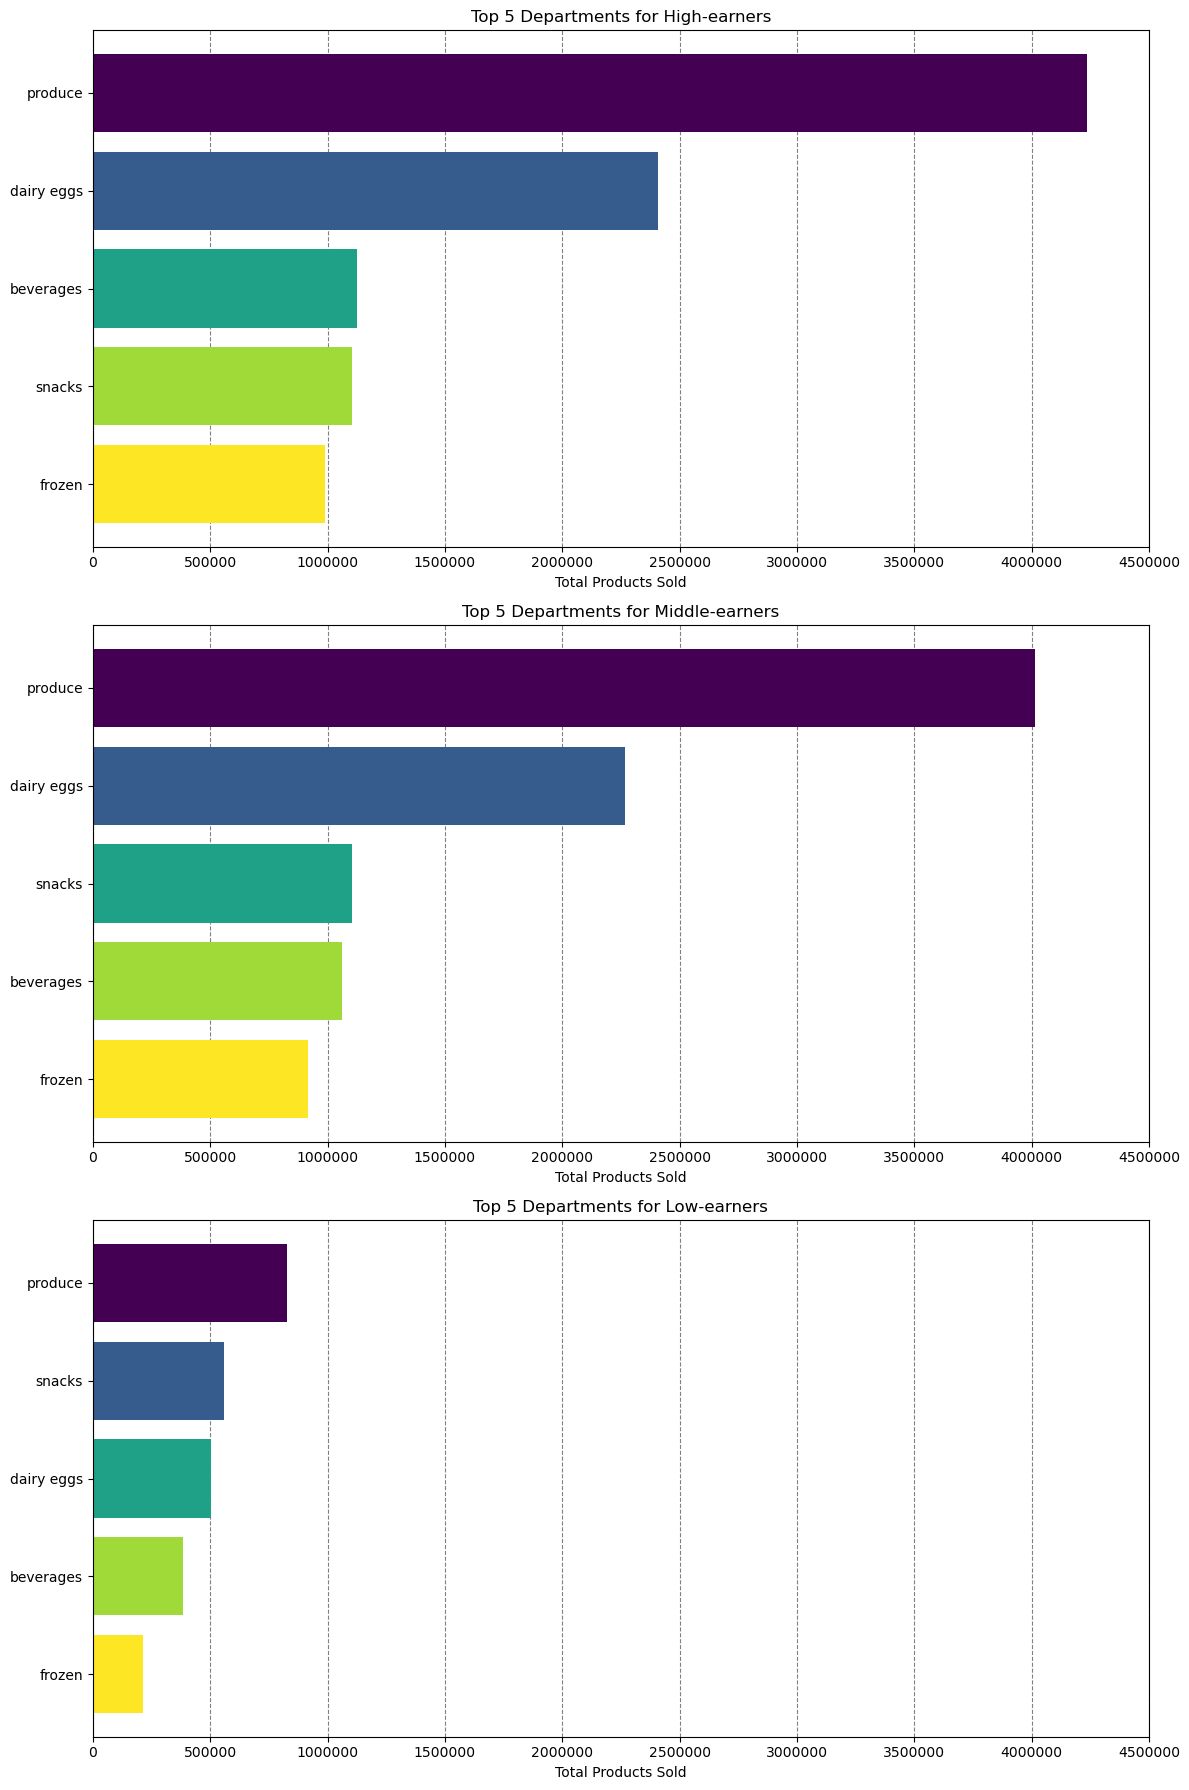

In [119]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = instacart.groupby(['Income_group', 'department']).size().reset_index(name='counts')
income_department_counts.sort_values(by=['Income_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
colors = plt.cm.viridis(np.linspace(0, 2, 8))  # Sets colour palette

# Define the desired order of income groups
desired_order = ['High', 'Middle', 'Low']

# Iterate over each income group and create a horizontal bar chart
for i, Income_group in enumerate(desired_order):
    income_data = income_department_counts[income_department_counts['Income_group'] == Income_group].head(5)
    ax = axs[i]
    ax.barh(income_data['department'], income_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {Income_group}-earners')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 4500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_Income_group.png'), bbox_inches = 'tight')
plt.show()

#### From the graph above, we can see that the high_earners tend to buy more of dairy eggs, the low_earners tend to buy more of snacks

#### 8.2(b) Age groups

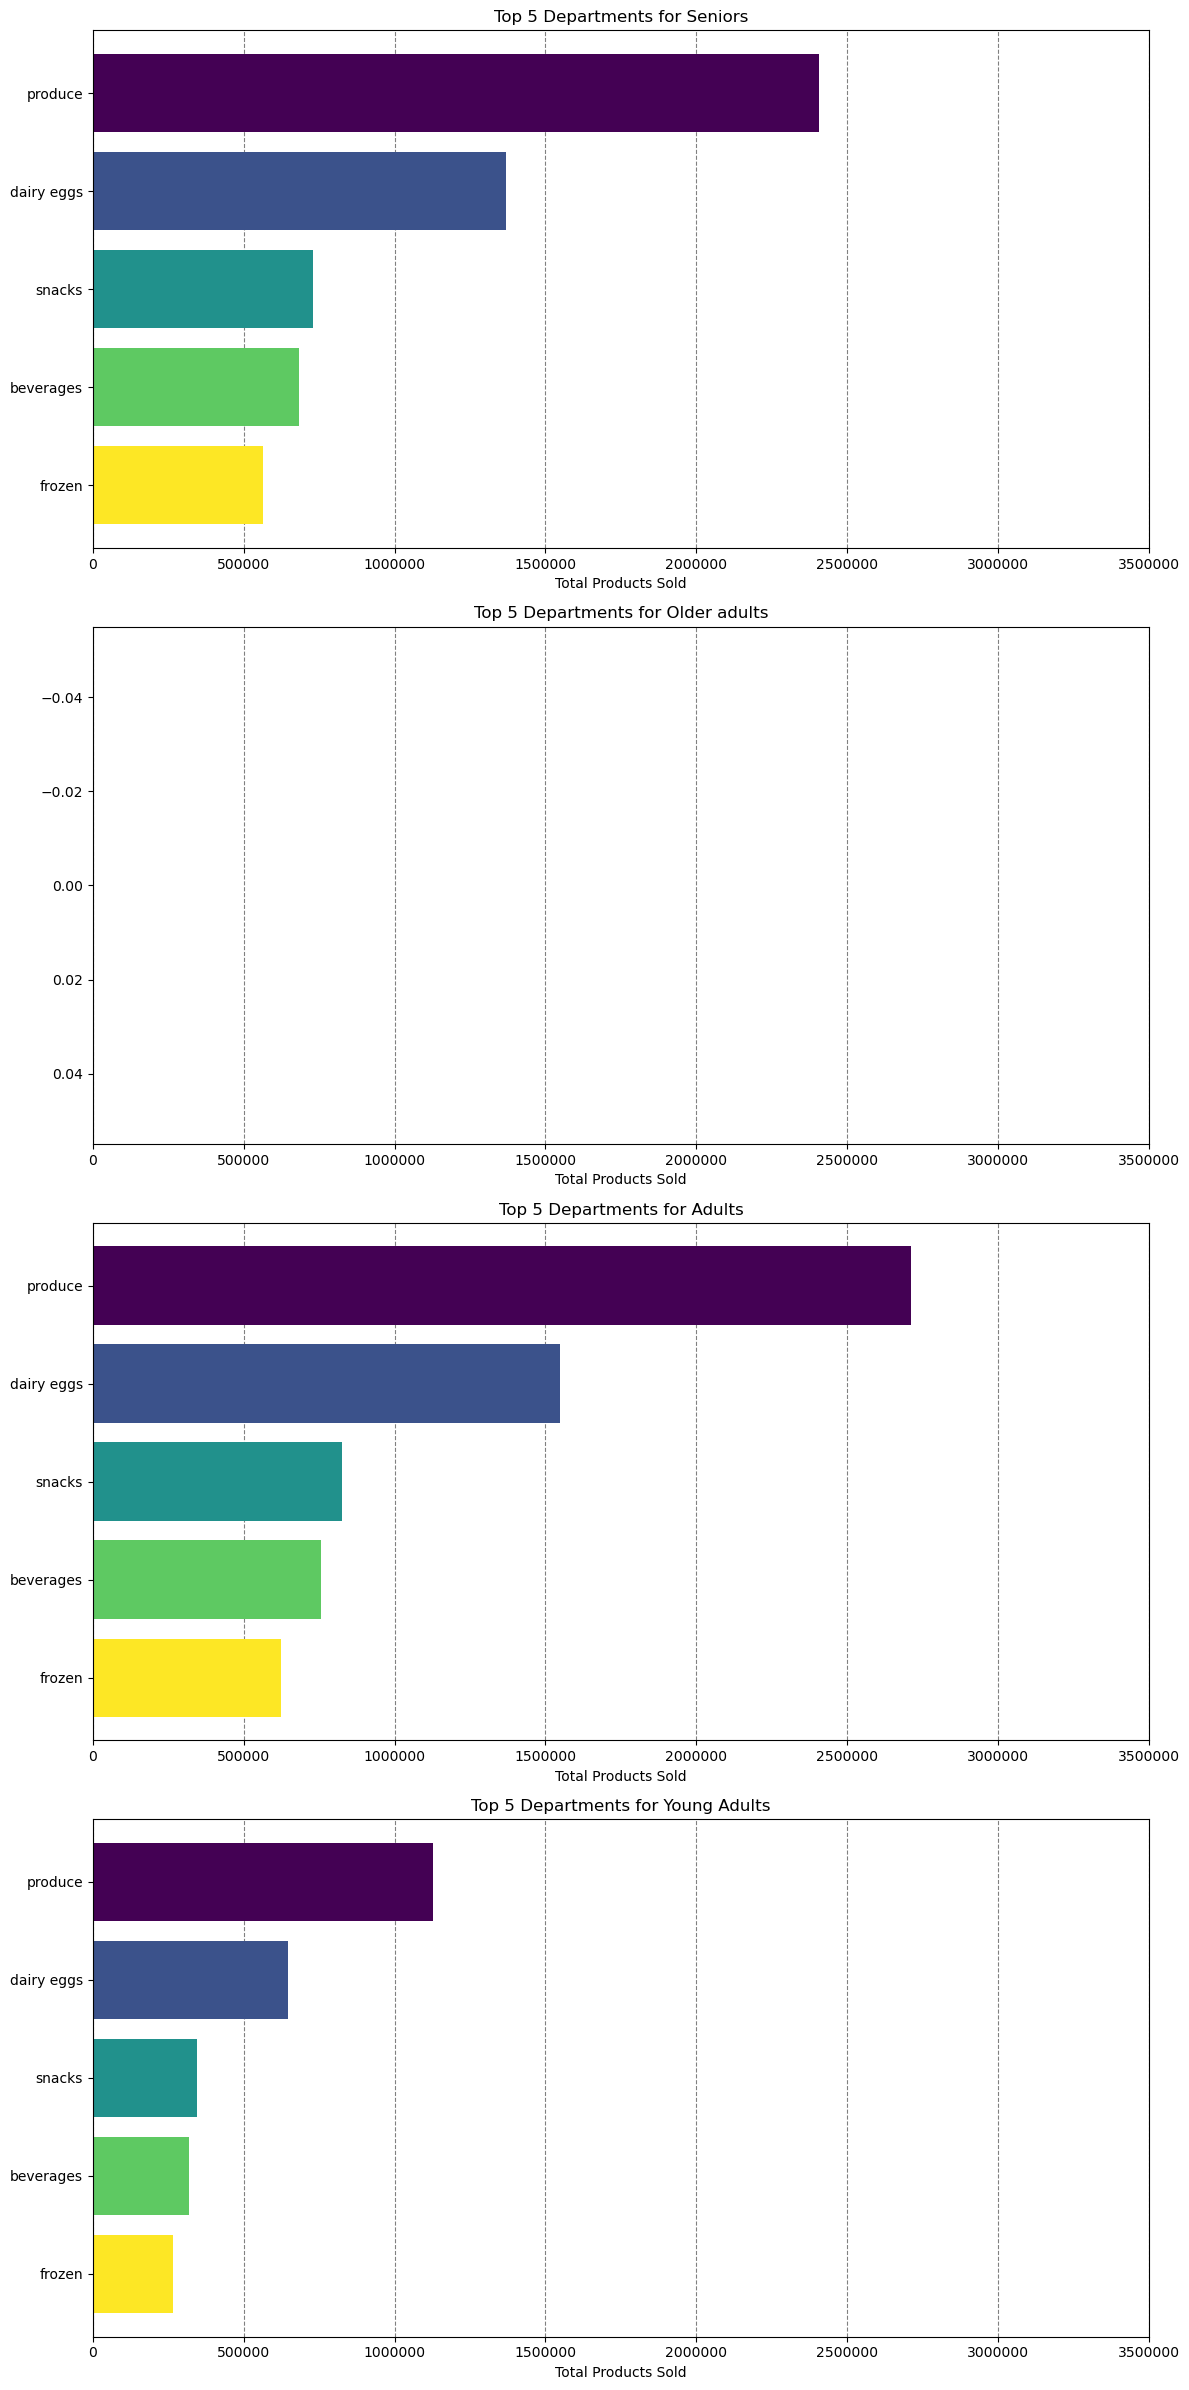

In [120]:
# Group by age_group and department, count occurrences, and sort
age_department_counts = instacart.groupby(['age_group', 'department']).size().reset_index(name='counts')
age_department_counts.sort_values(by=['age_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(4, 1, figsize=(12, 24))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
desired_age_order = ['Senior', 'Older adult', 'Adult', 'Young Adult']

# Iterate over each age group and create a horizontal bar chart
for i, age_group in enumerate(desired_age_order):
    age_data = age_department_counts[age_department_counts['age_group'] == age_group].head(5)
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {age_group}s')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 3500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_age_group.png'), bbox_inches = 'tight')
plt.show()

#### From the result, we can see that the top departments stays the same, the diifferent age groups doesnot show any difference between the department they buy most products from

#### 8.2(c) Dependants

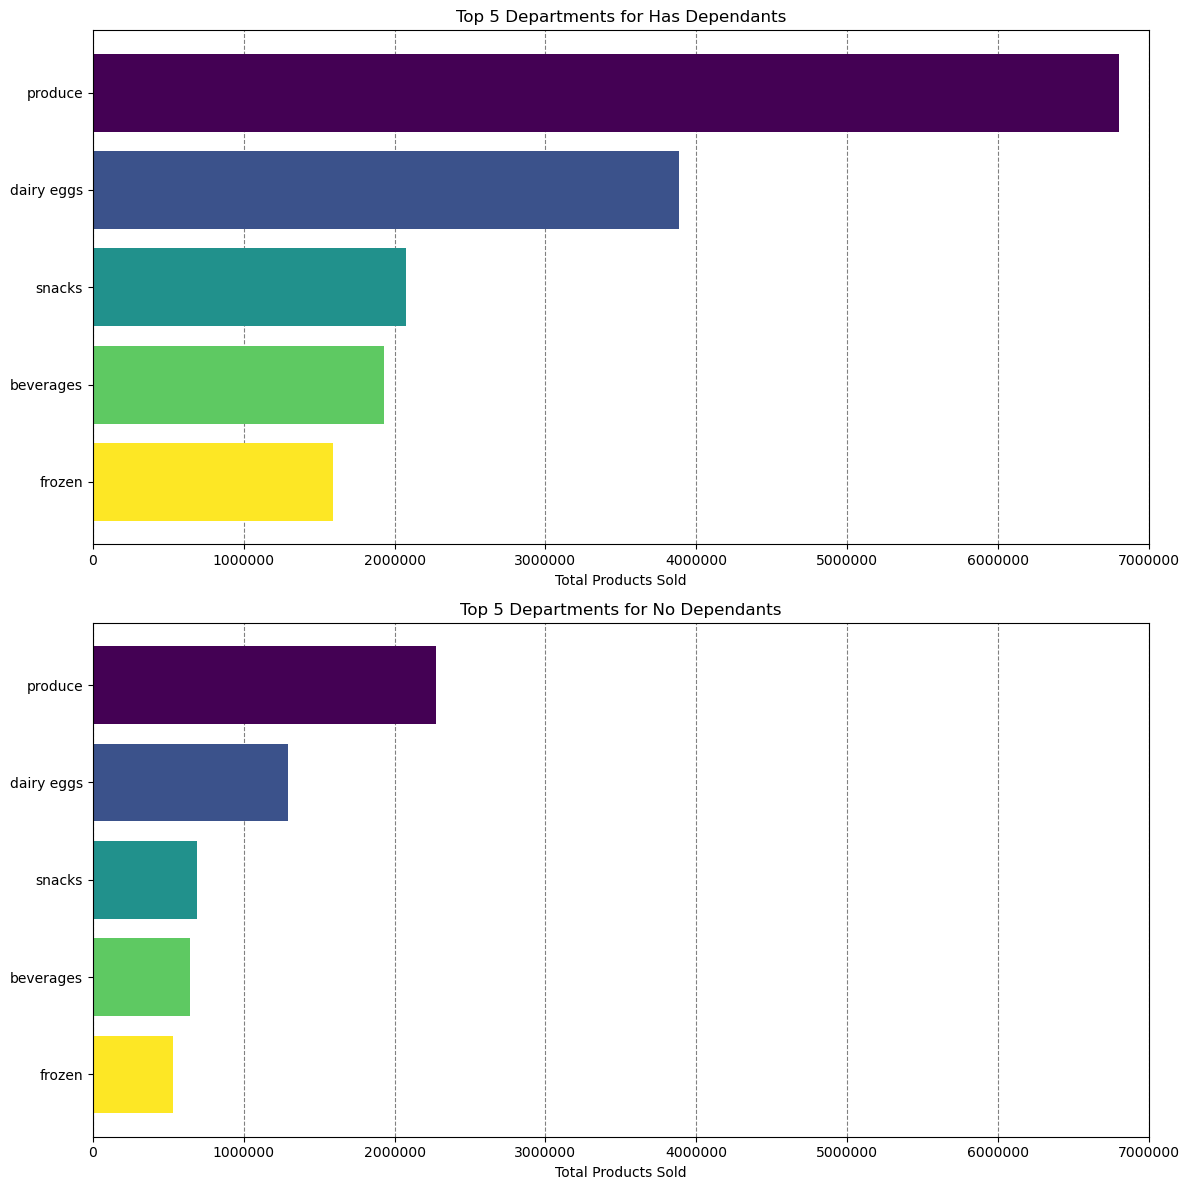

In [121]:
# Group by dependants_flag and department, count occurrences, and sort
dependants_department_counts = instacart.groupby(['dependants_flag', 'department']).size().reset_index(name='counts')
dependants_department_counts.sort_values(by=['dependants_flag', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
dependants_order = ['Has Dependants', 'No Dependants']

# Iterate over both dependants_flags and create a horizontal bar chart
for i, dependants_status in enumerate(dependants_order):
    dependants_data = dependants_department_counts[dependants_department_counts['dependants_flag'] == dependants_status].head(5)
    ax = axs[i]
    ax.barh(dependants_data['department'], dependants_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {dependants_status}')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 7000000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_dependants.png'), bbox_inches = 'tight')
plt.show()

#### From the graphs above, we can see that the customers with dependants buy more than the customers with no dependants and we can see taht the top departments are being consistent for both groups

### 8.3. Profiles by Frequency

#### 8.3(a) Income groups

In [122]:
# Creating crosstab for income and frequency
income_freq = pd.crosstab(instacart['Income_group'], instacart['frequency_flag'], dropna = False)

In [123]:
# Checking crosstab
income_freq

frequency_flag,Non-frequent customer,Regular customer,NaN
Income_group,,,
High,964659,2992142,10250227
Low,291060,759389,2312105
Middle,931698,2818724,9644560


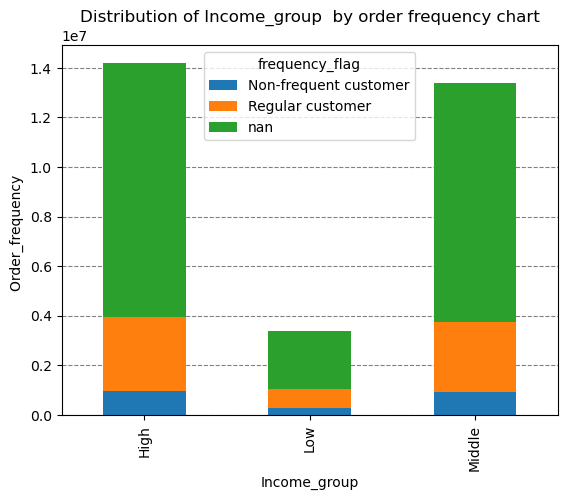

In [124]:
# Income Group and Order frequency Bar Chart

bar7 = income_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Income_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Income_group')

# Exporting bar chart

bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_frequency.png'))

#### 8.3(b) Age Groups

In [125]:
# Creating crosstab for age and frequency
age_freq = pd.crosstab(instacart['age_group'], instacart['frequency_flag'], dropna = False)

In [126]:
# Checking crosstab
age_freq

frequency_flag,Non-frequent customer,Regular customer,NaN
age_group,,,
Adult,647128,1970897,6596426
Older Adult,694888,2063083,6932080
Senior,574400,1726511,5894633
Young Adult,271001,809764,2783753


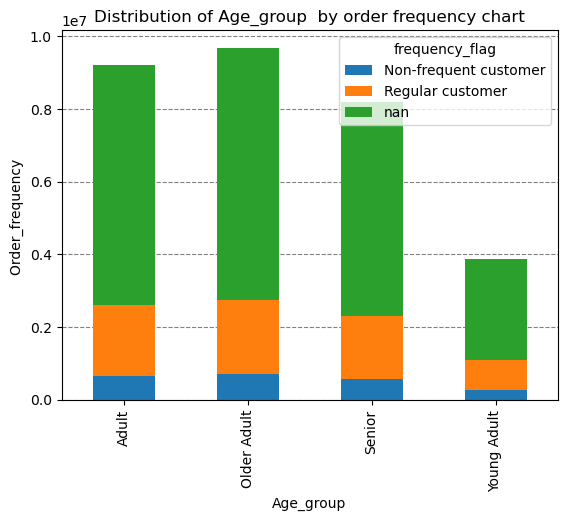

In [127]:
# Region Price Range Bar Chart

bar8 = age_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Age_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Age_group')

# Exporting bar chart

bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_freq.png'))

#### 8.3(c) Marital Status

In [129]:
# Creating crosstab for marital status and frequency
marital_freq = pd.crosstab(instacart['marital_status'], instacart['frequency_flag'], dropna = False)

In [130]:
# Checking crosstab
marital_freq

frequency_flag,Non-frequent customer,Regular customer,NaN
marital_status,,,
divorced/widowed,184799,556632,1903840
living with parents and siblings,104243,299636,1077293
married,1543064,4614660,15585987
single,355311,1099327,3639772


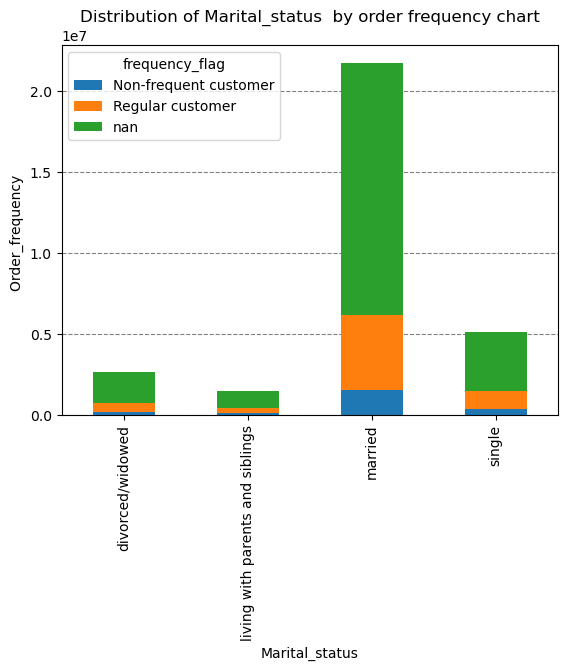

In [131]:
#Marital_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Marital_status  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Marital_status')

# Exporting bar chart

bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_freq.png'))

#### 8.3(d) Departments

In [132]:
# Creating crosstab for department and frequency
dep_freq = pd.crosstab(instacart['department'], instacart['frequency_flag'], dropna = False)

In [133]:
# Checking crosstab
dep_freq

frequency_flag,Non-frequent customer,Regular customer,NaN
department,,,
alcohol,9751,29354,105522
babies,18189,65192,327011
bakery,77236,236661,806931
beverages,186820,547828,1837253
breakfast,48776,145016,477058
bulk,1829,5790,25832
canned goods,82079,235080,694915
dairy eggs,340786,1051594,3784802
deli,74288,221463,708083


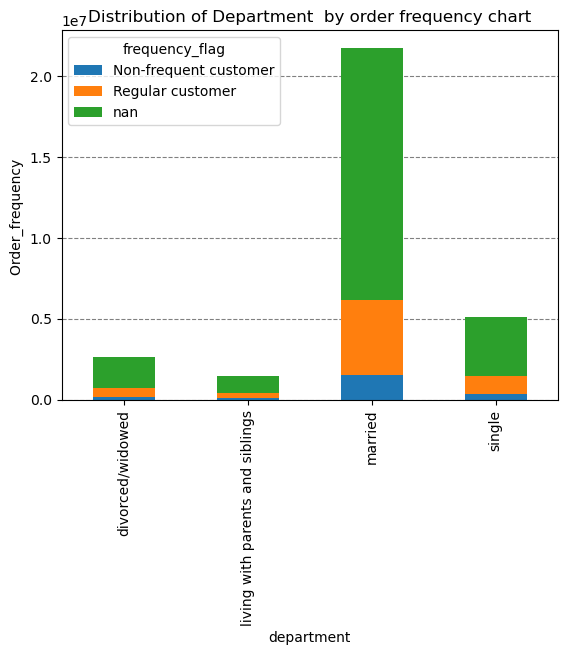

In [134]:
#dept_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('department')

# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_frequency.png'))

### 9. Visualisations

#### All the visualizations are exported

### 10. Export Final Data Set

In [137]:
instacart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_full_data.pkl'))

### Additional Analysis

### Top 10 departments for instacart

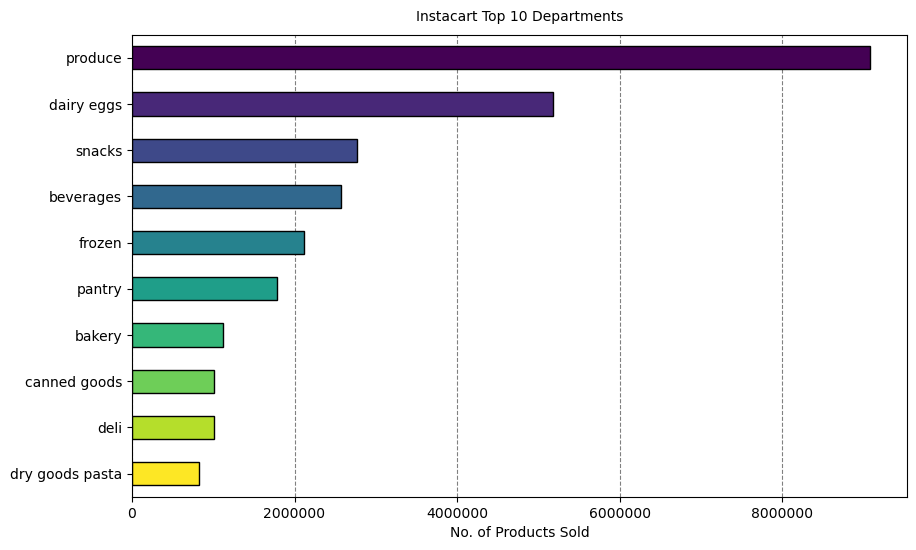

In [139]:
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

instacart['department'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors, 
                                                                                        zorder = 2, 
                                                                                        edgecolor = 'black')
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('No. of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Instacart_department_sales.png'), bbox_inches = 'tight')

In [140]:
# Frequency count
instacart['department'].value_counts(dropna=False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

### Ordering habits based on loyalty status

In [141]:
# Calculate average order_total
loyalty_order_total = orders_subset.groupby('loyalty_flag')['order_total'].mean().sort_values(ascending = False).reset_index()

In [142]:
# Check
loyalty_order_total

,loyalty_flag,order_total
0,New customer,132.125592
1,Regular customer,127.737518
2,Loyal customer,104.257950


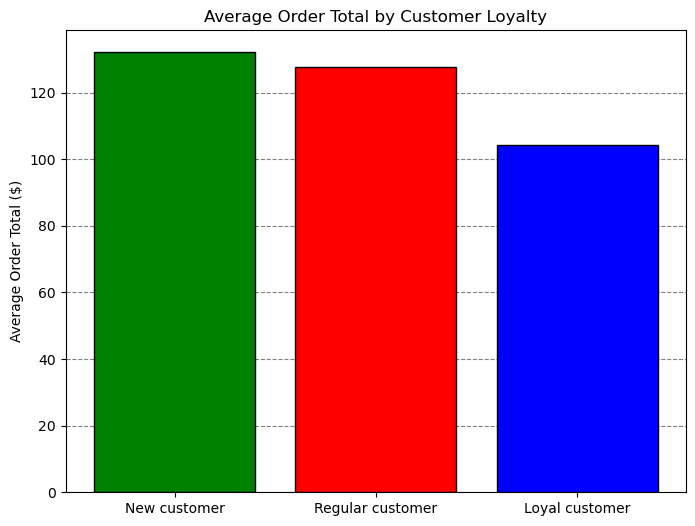

In [143]:
# Set up formatting and colours
plt.figure(figsize=(8, 6))
colors = ['green', 'red', 'blue']

# Plot bars
bars = plt.bar(loyalty_order_total['loyalty_flag'], loyalty_order_total['order_total'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_by_loyalty.png'), bbox_inches = 'tight')

In [144]:
# Average price of products purchased
product_avg_cost = instacart.groupby('loyalty_flag')['prices'].mean().sort_values(ascending = False).reset_index()

In [145]:
# Check
product_avg_cost

,loyalty_flag,prices
0,New customer,13.387725
1,Regular customer,12.495717
2,Loyal customer,10.386336


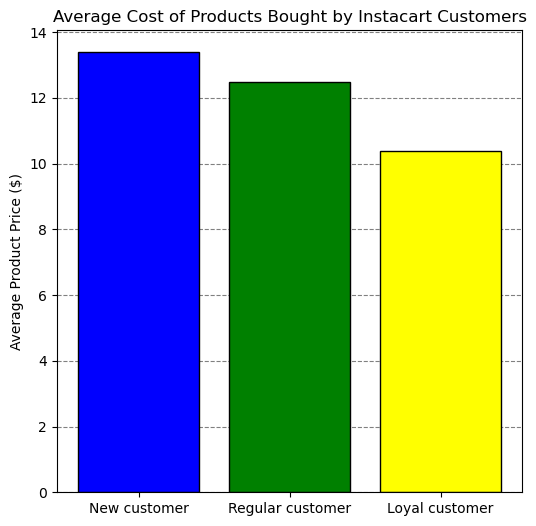

In [146]:
# Set up formatting and colours
plt.figure(figsize=(6, 6))
colors = ['blue', 'green', 'yellow']

# Plot bars
bars = plt.bar(product_avg_cost['loyalty_flag'], product_avg_cost['prices'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Cost of Products Bought by Instacart Customers")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Product Price ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_product_price_by_loyalty.png'), bbox_inches = 'tight')

### Total products ordered region wise

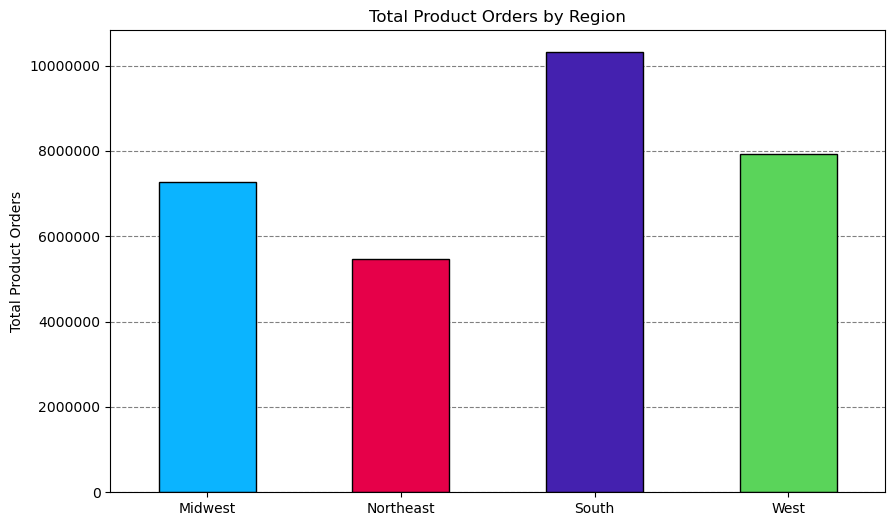

In [147]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
instacart['region'].value_counts().sort_index().plot.bar(color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
                                                         edgecolor='black', 
                                                         zorder=2, 
                                                         alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_total_orders_by_region.png'), bbox_inches = 'tight')

In [148]:
# Average order_total
region_avg_order_total = orders_subset.groupby('region')['order_total'].mean().sort_values(ascending = False).reset_index()

In [149]:
# Check
region_avg_order_total

,region,order_total
0,Midwest,128.027710
1,South,122.343512
2,Northeast,116.765440
3,West,114.091558


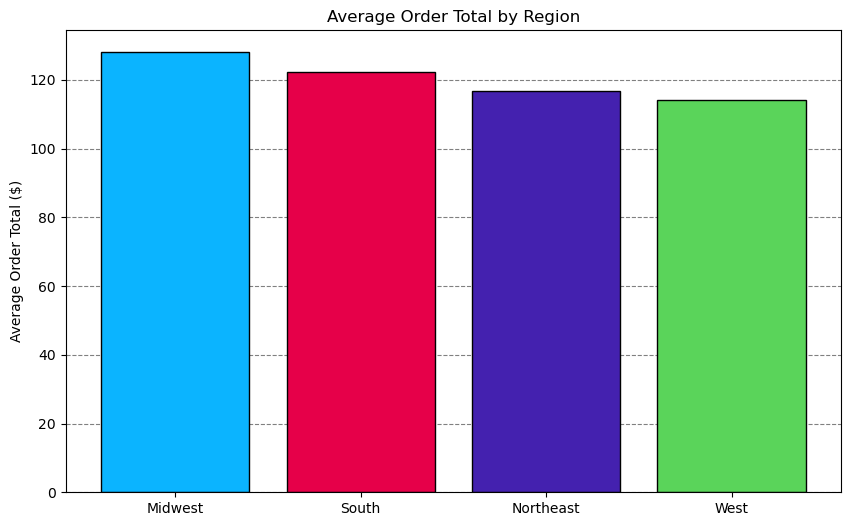

In [150]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(region_avg_order_total['region'], 
               region_avg_order_total['order_total'], 
               color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
               edgecolor='black', 
               zorder=2, 
               alpha = 1)
plt.title("Average Order Total by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_by_region.png'), bbox_inches = 'tight')

### Differences in the ordering habits based on customer profiles

In [151]:
# Income groups by the mean of the order_total - multilevel index
sorted_df = aggregations_by_income_gp.sort_values(by=('order_total', 'mean'), ascending=False)

In [152]:
# Check
sorted_df

days_since_prior_order                  order_total              \
                                min       mean   max         min        mean   
Income_group                                                                   
High                            0.0  10.091333  30.0         1.0  173.631537   
Middle                          0.0  10.118068  30.0         1.0   87.742358   
Low                             0.0  10.831101  30.0         1.0   52.629435   

                        
                   max  
Income_group            
High          100452.9  
Middle        100264.7  
Low              875.0

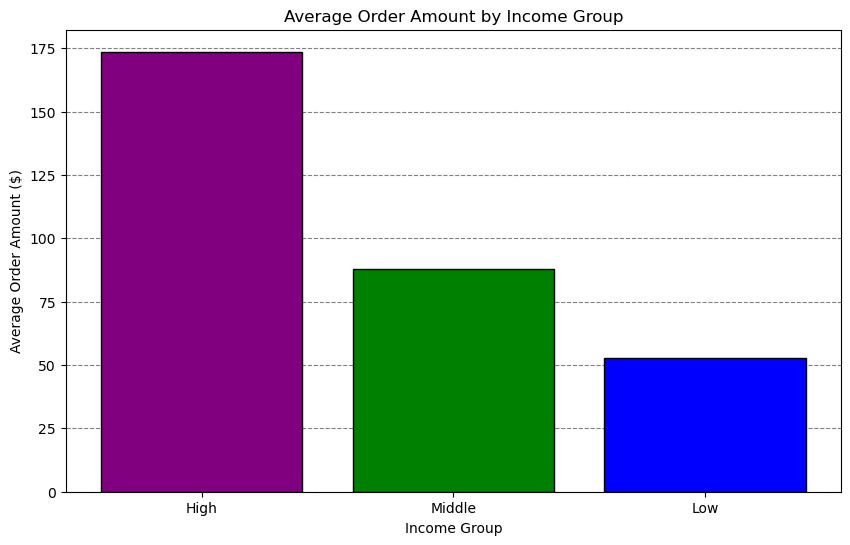

In [153]:
# Make bar chart for average order total
plt.figure(figsize=(10, 6))
plt.bar(sorted_df.index, sorted_df['order_total', 'mean'], color=['purple', 'green', 'blue'], zorder=2, edgecolor='black')
plt.xlabel('Income Group')
plt.ylabel('Average Order Amount ($)')
plt.title('Average Order Amount by Income Group')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_amount_by_income.png'), bbox_inches = 'tight')

/var/folders/d9/m6pz848x453dch7l819567br0000gn/T/ipykernel_11804/3477648777.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_parents['group'] = 'Young Parents'
/var/folders/d9/m6pz848x453dch7l819567br0000gn/T/ipykernel_11804/3477648777.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_adults['group'] = 'Single Adults'


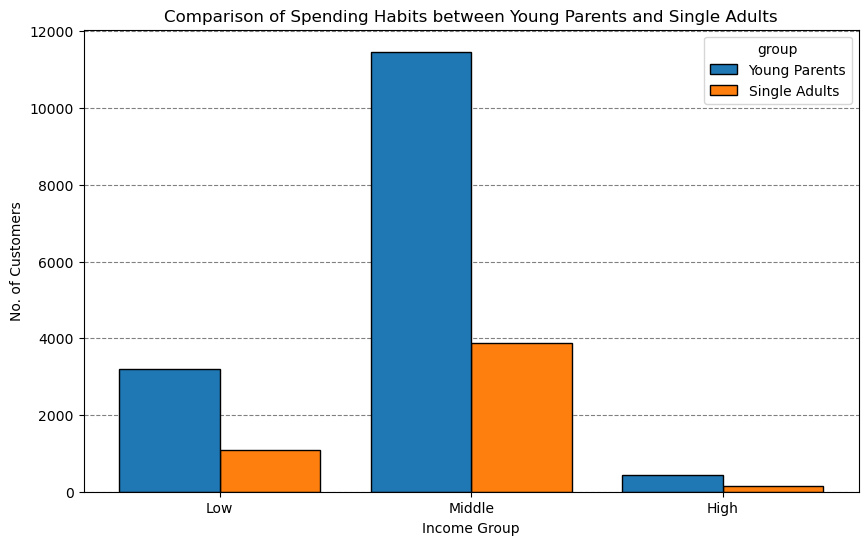

In [154]:
# Filter data for young parents and single adults
young_parents = user_sample[(user_sample['dependants_flag'] == 'Has Dependants') & (user_sample['age_group'] == 'Young Adult')]
single_adults = user_sample[(user_sample['dependants_flag'] == 'No Dependants') & (user_sample['age_group'] == 'Young Adult')]

# Combine filtered data and add a 'group' column
young_parents['group'] = 'Young Parents'
single_adults['group'] = 'Single Adults'
combined_data = pd.concat([young_parents, single_adults])

plt.figure(figsize=(10, 6))
# Plot the histogram bars with group breakdown
sns.histplot(data=combined_data, x='Income_group', hue='group', multiple='dodge', shrink=.8, alpha=1, element='bars', stat='count', common_norm=False)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Comparison of Spending Habits between Young Parents and Single Adults')
plt.ylabel('No. of Customers')
plt.xlabel('Income Group')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'young_parents_vs_single_adults_income_group.png'), bbox_inches='tight')
plt.show()
